# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Dewi Rachmawati
- Email: rchmw.dewi10@gmail.com
- Id Dicoding: iam_dewir

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
!pip install sqlalchemy
!pip install joblib
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import joblib

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [2]:
dataset = 'https://raw.githubusercontent.com/dysthymicfact/hr-attrition/refs/heads/main/employee_data.csv'
hr_df = pd.read_csv(dataset)

## Data Understanding

### Assesing Data

Melihat 5 baris teratas dataset

In [3]:
hr_df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


Melihat informasi dataset

In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

**Insight:**
Dataset memiliki 1470 baris dan 35 kolom dengan 3 macam tipe data yakni object, integer dan float.

Mengecek masing-maisng jumlah kolom numerikal dan kategorikal

In [5]:
num_cols = hr_df.select_dtypes(include=['int64','float64']).columns
cat_cols = hr_df.select_dtypes(include=['object']).columns

num_counts = len(num_cols)
cat_counts = len(cat_cols)

print(f"Jumlah kolom numerikal dalam dataset: {num_counts}")
print(f"Jumlah kolom kategorikal dalam dataset: {cat_counts}")

Jumlah kolom numerikal dalam dataset: 27
Jumlah kolom kategorikal dalam dataset: 8


Mengecek missing values dalam dataset

In [6]:
hr_df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


**Insight:**
Terdapat 1 kolom yang memiliki missing values yakni kolom atrrition dengan total missing values adalah 412 baris

Mengecek duplikasi data dalam dataset

In [7]:
print("Jumlah duplikasi data dalam dataset:", hr_df.duplicated().sum())

Jumlah duplikasi data dalam dataset: 0


**Insight:**
Dataset tidak memiliki duplikasi data

### Cleaning Data

In [8]:
# Menangani missing values dalam dataset
df = hr_df.dropna()
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [9]:
# Cek data shape
print("Jumlah baris sebelum dibersihkan: ", hr_df.shape[0], ", Jumlah kolom: ", hr_df.shape[1])
print("Jumlah baris setelah dibersihkan: ", df.shape[0], ", Jumlah kolom: ", df.shape[1])

Jumlah baris sebelum dibersihkan:  1470 , Jumlah kolom:  35
Jumlah baris setelah dibersihkan:  1058 , Jumlah kolom:  35


In [10]:
# Menyimpan data hasil cleaning
df.to_csv("employee_data_cleaned.csv", index=False)

Dataset hasil cleaning disimpan dalam format csv untuk keperluan dashboard

## Exploratory Data Analysis (EDA)

In [11]:
# Cek data variabel numerikal
num_cols

Index(['EmployeeId', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
# cek data variabel kategorikal
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Analisis deskriptif statistik

In [13]:
df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058.000000,1058,1058.0,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,746,NaN,701,NaN,NaN,436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,0.169187,NaN,809.542533,NaN,8.978261,2.879017,NaN,1.0,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,NaN,408.478049,NaN,8.040608,1.031442,NaN,0.0,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,NaN,465.250000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,NaN,817.500000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000


Fitur Numerikal terhadap Attrition

           Jumlah karyawan  Persentase
Attrition                             
0                      879        83.1
1                      179        16.9


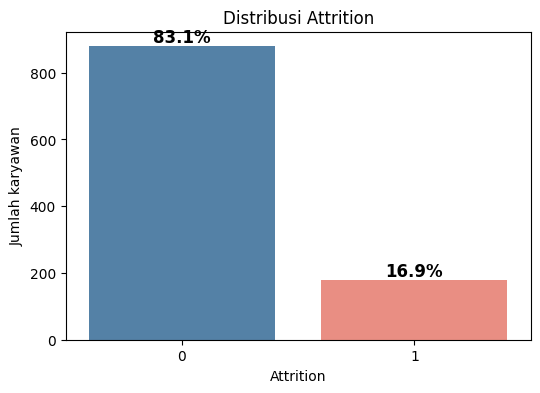

In [14]:
# Konversi ke integer
df["Attrition"] = df["Attrition"].astype(int)

# Distribusi kolom target "Attrition"
count = df["Attrition"].value_counts()
percent = 100 * df["Attrition"].value_counts(normalize=True)

df_attrition = pd.DataFrame({"Jumlah karyawan": count, "Persentase": percent.round(1)})
print(df_attrition)

# Warna kontras untuk masing-masing kategori
color_map = {0: "steelblue", 1: "salmon"}

# `.map()` untuk memastikan nilai cocok dengan palet warna
df["Attrition_color"] = df["Attrition"].map(color_map)

# Visualisasi distribusi
plt.figure(figsize=(6,4))
ax = sns.barplot(x=df_attrition.index, y=df_attrition["Jumlah karyawan"],
                 palette=[color_map[val] for val in df_attrition.index])

# Tambahkan persentase di atas batang
for p, percentage in zip(ax.patches, df_attrition["Persentase"]):
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title("Distribusi Attrition")
plt.ylabel("Jumlah karyawan")
plt.xlabel("Attrition")
plt.show()


 Attrition Rate by Age Group:
            Total Employees  Attrition Count  Attrition Rate (%)
Age_Group                                                      
18-25                   70               29                41.4
26-35                  401               85                21.2
56-65                   55                9                16.4
36-45                  351               39                11.1
46-55                  181               17                 9.4


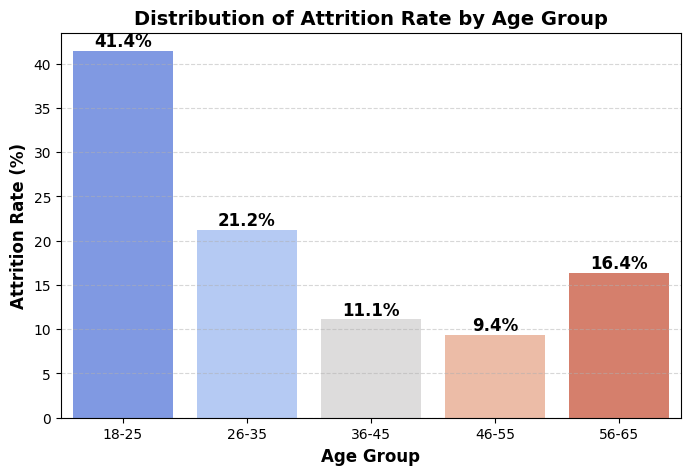

In [15]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['Age'] = df['Age'].astype(int)

# ============================== Analisis Attrition by Age ==============================
# Mengelompokkan usia ke dalam rentang kategori
bins = [18, 25, 35, 45, 55, 65]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Menghitung total karyawan & attrition berdasarkan kelompok usia
employee_per_age_group = df["Age_Group"].value_counts()
attrition_per_age_group = df[df['Attrition'] == 1]['Age_Group'].value_counts()
attrition_age_percentage = (attrition_per_age_group / employee_per_age_group) * 100

# Menampilkan Tabel Analisis
attrition_age_df = pd.DataFrame({
    "Total Employees": employee_per_age_group,
    "Attrition Count": attrition_per_age_group,
    "Attrition Rate (%)": attrition_age_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Age Group:\n", attrition_age_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_age_percentage.index, y=attrition_age_percentage.values, palette="coolwarm")
plt.xlabel("Age Group", fontsize=12, fontweight="bold")
plt.ylabel("Attrition Rate (%)", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Age Group", fontsize=14, fontweight="bold")
plt.xticks(rotation=0, fontsize=10)

# Menampilkan nilai persentase di atas setiap bar
for i, value in enumerate(attrition_age_percentage.values):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha="center", fontsize=12, fontweight="bold")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


 Attrition Rate by Education Level:
            Total Employees  Attrition Count  Attrition Rate (%)
Education                                                      
1                      131               26                19.8
3                      410               76                18.5
4                      276               44                15.9
2                      208               31                14.9
5                       33                2                 6.1


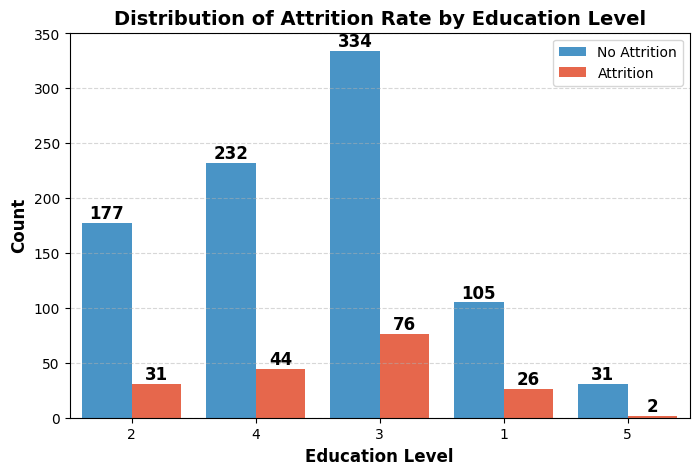

In [16]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['Education'] = df['Education'].astype(str).str.strip()

# ============================== Analisis Attrition by Education ==============================
# Menghitung total karyawan & attrition berdasarkan pendidikan
employee_per_education = df["Education"].value_counts()
attrition_per_education = df[df['Attrition'] == 1]['Education'].value_counts()
attrition_education_percentage = (attrition_per_education / employee_per_education) * 100

# Menampilkan Tabel Analisis
attrition_education_df = pd.DataFrame({
    "Total Employees": employee_per_education,
    "Attrition Count": attrition_per_education,
    "Attrition Rate (%)": attrition_education_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Education Level:\n", attrition_education_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi
plt.figure(figsize=(8,5))
ax = sns.countplot(x="Education", hue="Attrition", data=df, palette=["#3498DB", "#FF5733"])

plt.xlabel("Education Level", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Education Level", fontsize=14, fontweight="bold")
plt.legend(["No Attrition", "Attrition"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0, fontsize=10)

# Menampilkan nilai persentase di atas setiap bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Hanya menampilkan jika ada data
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f"{height:.0f}",
            ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
        )

plt.show()


 Attrition Rate by Distance From Home:
                   Total Employees  Attrition Count  Attrition Rate (%)
DistanceFromHome                                                      
12                             13                5                38.5
22                             11                4                36.4
24                             18                6                33.3
13                             10                3                30.0
25                             21                6                28.6
15                             15                4                26.7
29                             20                5                25.0
14                             16                4                25.0
27                              8                2                25.0
23                             22                5                22.7
16                             19                4                21.1
17                             15   

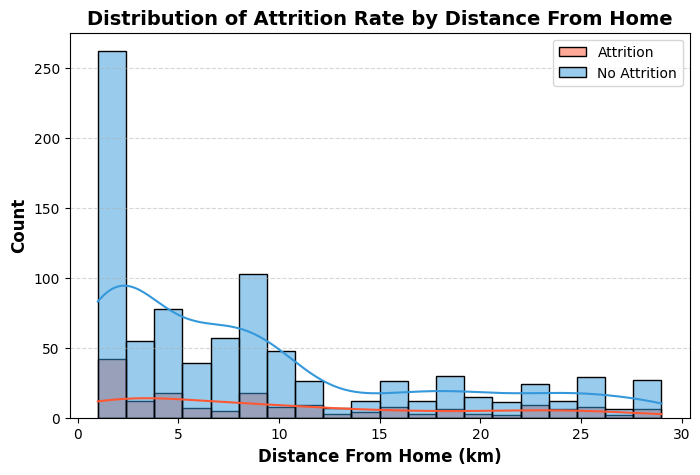

In [17]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['DistanceFromHome'] = df['DistanceFromHome'].astype(int)

# ============================== Analisis Attrition by DistanceFromHome ==============================
# Menghitung total karyawan & attrition berdasarkan DistanceFromHome
employee_per_distance = df["DistanceFromHome"].value_counts().sort_index()
attrition_per_distance = df[df['Attrition'] == 1]['DistanceFromHome'].value_counts().sort_index()
attrition_distance_percentage = (attrition_per_distance / employee_per_distance) * 100

# Menampilkan Tabel Analisis
attrition_distance_df = pd.DataFrame({
    "Total Employees": employee_per_distance,
    "Attrition Count": attrition_per_distance,
    "Attrition Rate (%)": attrition_distance_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Distance From Home:\n", attrition_distance_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi Distribusi dengan Histogram
plt.figure(figsize=(8,5))
sns.histplot(df[df['Attrition'] == 1]['DistanceFromHome'], bins=20, color="#FF5733", kde=True, label="Attrition")
sns.histplot(df[df['Attrition'] == 0]['DistanceFromHome'], bins=20, color="#3498DB", kde=True, label="No Attrition")
plt.xlabel("Distance From Home (km)", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Distance From Home", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


 Attrition Rate by Environment Satisfaction:
                          Total Employees  Attrition Count  Attrition Rate (%)
EnvironmentSatisfaction                                                      
1                                    209               57                27.3
2                                    200               35                17.5
3                                    335               47                14.0
4                                    314               40                12.7


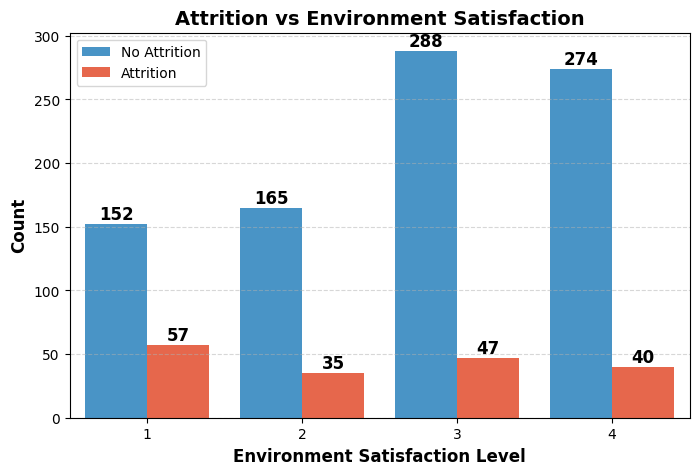

In [18]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(int)

# ============================== Analisis Attrition by Environment Satisfaction ==============================
# Menghitung total karyawan & attrition berdasarkan Environment Satisfaction
employee_per_env_sat = df["EnvironmentSatisfaction"].value_counts().sort_index()
attrition_per_env_sat = df[df['Attrition'] == 1]['EnvironmentSatisfaction'].value_counts().sort_index()
attrition_env_sat_percentage = (attrition_per_env_sat / employee_per_env_sat) * 100

# Menampilkan Tabel Analisis
attrition_env_sat_df = pd.DataFrame({
    "Total Employees": employee_per_env_sat,
    "Attrition Count": attrition_per_env_sat,
    "Attrition Rate (%)": attrition_env_sat_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Environment Satisfaction:\n", attrition_env_sat_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi dengan Countplot
plt.figure(figsize=(8,5))
ax = sns.countplot(x="EnvironmentSatisfaction", hue="Attrition", data=df, palette=["#3498DB", "#FF5733"])  # Biru untuk No, Merah untuk Yes

plt.xlabel("Environment Satisfaction Level", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Attrition vs Environment Satisfaction", fontsize=14, fontweight="bold")
plt.legend(["No Attrition", "Attrition"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0, fontsize=10)

# Menampilkan nilai di atas setiap bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Hanya menampilkan jika ada data
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f"{height:.0f}",
            ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
        )

plt.show()


 Attrition Rate by Hourly Rate:
             Total Employees  Attrition Count  Attrition Rate (%)
HourlyRate                                                      
50                       13              6.0                46.2
34                        9              4.0                44.4
85                       13              5.0                38.5
70                       12              4.0                33.3
57                       21              6.0                28.6
...                     ...              ...                 ...
83                       19              1.0                 5.3
30                       15              0.0                 0.0
42                       19              0.0                 0.0
59                       13              0.0                 0.0
75                       17              0.0                 0.0

[71 rows x 3 columns]


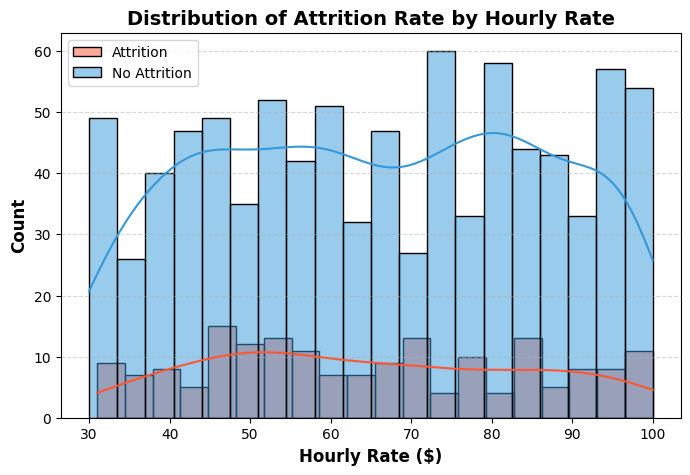

In [19]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['HourlyRate'] = df['HourlyRate'].astype(int)

# ============================== Analisis Attrition by Hourly Rate ==============================
# Menghitung total karyawan & attrition berdasarkan Hourly Rate
employee_per_hourly_rate = df["HourlyRate"].value_counts().sort_index()
attrition_per_hourly_rate = df[df['Attrition'] == 1]['HourlyRate'].value_counts().sort_index()
attrition_hourly_rate_percentage = (attrition_per_hourly_rate / employee_per_hourly_rate) * 100

# Menampilkan Tabel Analisis
attrition_hourly_rate_df = pd.DataFrame({
    "Total Employees": employee_per_hourly_rate,
    "Attrition Count": attrition_per_hourly_rate,
    "Attrition Rate (%)": attrition_hourly_rate_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Hourly Rate:\n", attrition_hourly_rate_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi
plt.figure(figsize=(8,5))
sns.histplot(df[df['Attrition'] == 1]['HourlyRate'], bins=20, color="#FF5733", kde=True, label="Attrition")
sns.histplot(df[df['Attrition'] == 0]['HourlyRate'], bins=20, color="#3498DB", kde=True, label="No Attrition")
plt.xlabel("Hourly Rate ($)", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Hourly Rate", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**Insight:** karyawan dengan hourly rate lebih tinggi tidak hanya lebih sedikit mengalami attrition tetapi juga memiliki distribusi yang lebih menyebar. Ini mungkin menunjukkan bahwa faktor lain seperti pengalaman kerja, job role, atau benefit tambahan juga mempengaruhi keputusan untuk bertahan. Sementara itu, distribusi karyawan yang keluar tampaknya lebih terkonsentrasi di bagian bawah kisaran hourly rate, yang bisa menjadi tanda bahwa mereka merasa kurang dihargai secara finansial atau mencari pekerjaan dengan kompensasi lebih baik.   


 Attrition Rate by Job Involvement:
                 Total Employees  Attrition Count  Attrition Rate (%)
JobInvolvement                                                      
1                            55               22                40.0
2                           273               55                20.1
3                           625               92                14.7
4                           105               10                 9.5


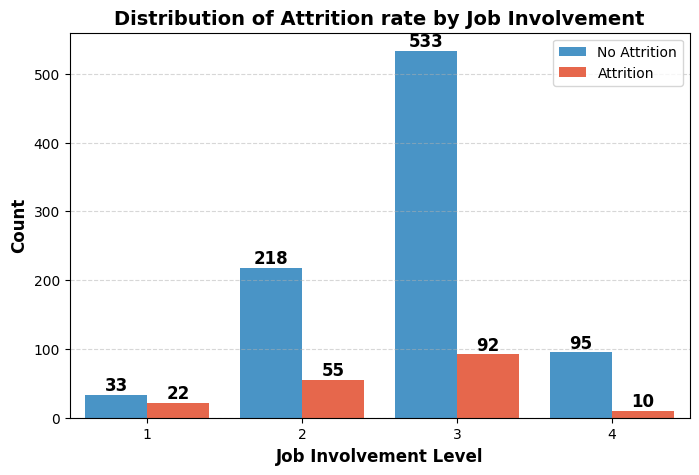

In [20]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['JobInvolvement'] = df['JobInvolvement'].astype(int)

# ============================== Analisis Attrition by Job Involvement ==============================
# Menghitung total karyawan & attrition berdasarkan Job Involvement
employee_per_job_involvement = df["JobInvolvement"].value_counts().sort_index()
attrition_per_job_involvement = df[df['Attrition'] == 1]['JobInvolvement'].value_counts().sort_index()
attrition_job_involvement_percentage = (attrition_per_job_involvement / employee_per_job_involvement) * 100

# Menampilkan Tabel Analisis
attrition_job_involvement_df = pd.DataFrame({
    "Total Employees": employee_per_job_involvement,
    "Attrition Count": attrition_per_job_involvement,
    "Attrition Rate (%)": attrition_job_involvement_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Job Involvement:\n", attrition_job_involvement_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi
plt.figure(figsize=(8,5))
ax = sns.countplot(x="JobInvolvement", hue="Attrition", data=df, palette=["#3498DB", "#FF5733"])  # Biru untuk No Attrition, Merah untuk Attrition

plt.xlabel("Job Involvement Level", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition rate by Job Involvement", fontsize=14, fontweight="bold")
plt.legend(["No Attrition", "Attrition"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0, fontsize=10)

# Menampilkan nilai di atas setiap bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Hanya menampilkan jika ada data
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f"{height:.0f}",
            ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
        )

plt.show()


 Attrition Rate by Job Level:
           Total Employees  Attrition Count  Attrition Rate (%)
JobLevel                                                      
1                     394              108                27.4
3                     165               25                15.2
2                     364               37                10.2
5                      55                5                 9.1
4                      80                4                 5.0


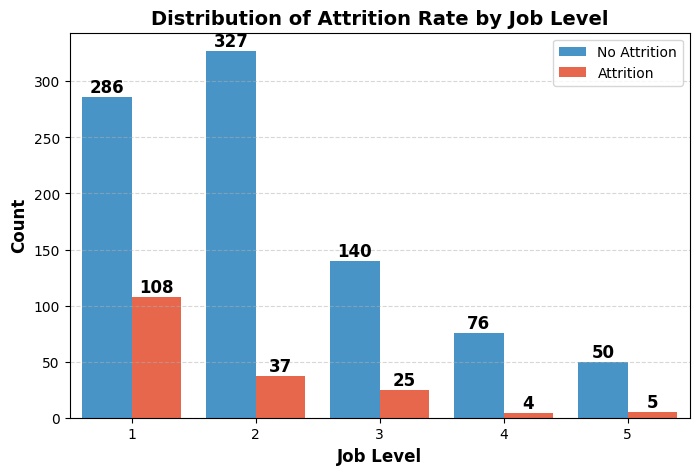

In [21]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['JobLevel'] = df['JobLevel'].astype(int)

# ============================== Analisis Attrition by Job Level ==============================
# Menghitung total karyawan & attrition berdasarkan Job Level
employee_per_job_level = df["JobLevel"].value_counts().sort_index()
attrition_per_job_level = df[df['Attrition'] == 1]['JobLevel'].value_counts().sort_index()
attrition_job_level_percentage = (attrition_per_job_level / employee_per_job_level) * 100

# Menampilkan Tabel Analisis
attrition_job_level_df = pd.DataFrame({
    "Total Employees": employee_per_job_level,
    "Attrition Count": attrition_per_job_level,
    "Attrition Rate (%)": attrition_job_level_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Job Level:\n", attrition_job_level_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi dengan Countplot
plt.figure(figsize=(8,5))
ax = sns.countplot(x="JobLevel", hue="Attrition", data=df, palette=["#3498DB", "#FF5733"])  # Biru untuk No Attrition, Merah untuk Attrition

plt.xlabel("Job Level", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Job Level", fontsize=14, fontweight="bold")
plt.legend(["No Attrition", "Attrition"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0, fontsize=10)

# Menampilkan nilai di atas setiap bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Hanya menampilkan jika ada data
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f"{height:.0f}",
            ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
        )

plt.show()


 Attrition Rate by Job Satisfaction:
                  Total Employees  Attrition Count  Attrition Rate (%)
JobSatisfaction                                                      
1                            205               46                22.4
3                            318               62                19.5
2                            195               32                16.4
4                            340               39                11.5


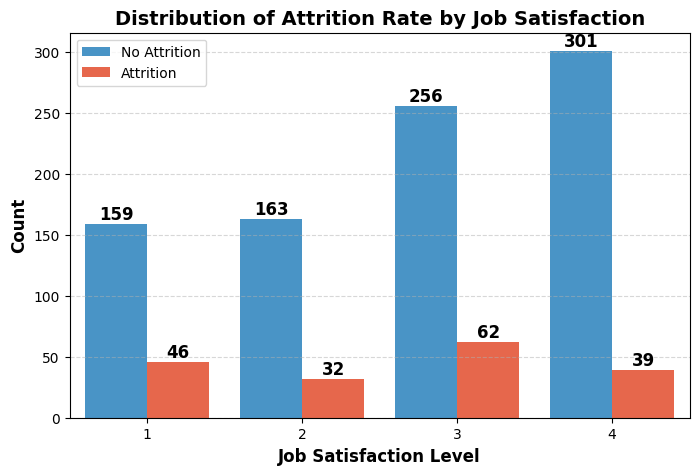

In [22]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(int)

# ============================== Analisis Attrition by Job Satisfaction ==============================
# Menghitung total karyawan & attrition berdasarkan Job Satisfaction
employee_per_job_satisfaction = df["JobSatisfaction"].value_counts().sort_index()
attrition_per_job_satisfaction = df[df['Attrition'] == 1]['JobSatisfaction'].value_counts().sort_index()
attrition_job_satisfaction_percentage = (attrition_per_job_satisfaction / employee_per_job_satisfaction) * 100

# Menampilkan Tabel Analisis
attrition_job_satisfaction_df = pd.DataFrame({
    "Total Employees": employee_per_job_satisfaction,
    "Attrition Count": attrition_per_job_satisfaction,
    "Attrition Rate (%)": attrition_job_satisfaction_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Job Satisfaction:\n", attrition_job_satisfaction_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi dengan Countplot
plt.figure(figsize=(8,5))
ax = sns.countplot(x="JobSatisfaction", hue="Attrition", data=df, palette=["#3498DB", "#FF5733"])  # Biru untuk No Attrition, Merah untuk Attrition

plt.xlabel("Job Satisfaction Level", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Job Satisfaction", fontsize=14, fontweight="bold")
plt.legend(["No Attrition", "Attrition"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0, fontsize=10)

# Menampilkan nilai di atas setiap bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Hanya menampilkan jika ada data
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f"{height:.0f}",
            ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
        )

plt.show()


 Attrition Rate by Monthly Income:
                Total Employees  Attrition Count  Attrition Rate (%)
MonthlyIncome                                                      
1420                         1              1.0               100.0
1675                         1              1.0               100.0
1859                         1              1.0               100.0
2028                         1              1.0               100.0
1878                         1              1.0               100.0
...                        ...              ...                 ...
4554                         1              0.0                 0.0
4553                         1              0.0                 0.0
4541                         1              0.0                 0.0
4539                         1              0.0                 0.0
4647                         1              0.0                 0.0

[991 rows x 3 columns]


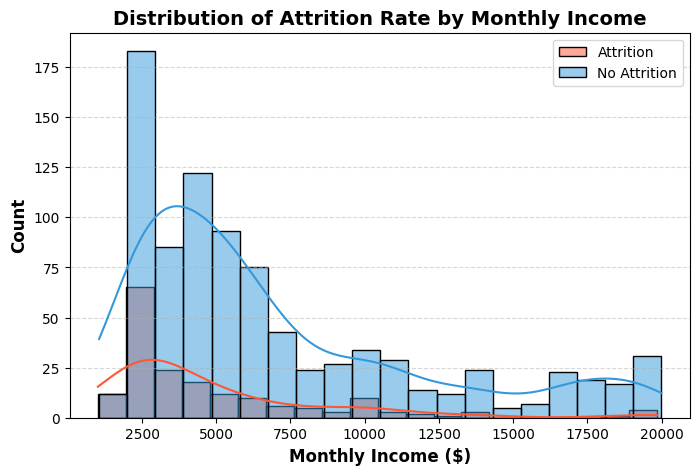

In [23]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['MonthlyIncome'] = df['MonthlyIncome'].astype(int)

# ============================== Analisis Attrition by Monthly Income ==============================
# Menghitung total karyawan & attrition berdasarkan Monthly Income
employee_per_income = df["MonthlyIncome"].value_counts().sort_index()
attrition_per_income = df[df['Attrition'] == 1]['MonthlyIncome'].value_counts().sort_index()
attrition_income_percentage = (attrition_per_income / employee_per_income) * 100

# Menampilkan Tabel Analisis
attrition_income_df = pd.DataFrame({
    "Total Employees": employee_per_income,
    "Attrition Count": attrition_per_income,
    "Attrition Rate (%)": attrition_income_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Monthly Income:\n", attrition_income_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi dengan Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(df[df['Attrition'] == 1]['MonthlyIncome'], bins=20, color="#FF5733", kde=True, label="Attrition")
sns.histplot(df[df['Attrition'] == 0]['MonthlyIncome'], bins=20, color="#3498DB", kde=True, label="No Attrition")
plt.xlabel("Monthly Income ($)", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Monthly Income", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**Insight:** Karyawan dengan pendapatan bulanan yang lebih rendah memiliki proporsi Attrition yang lebih tinggi dibandingkan dengan berpendapatan lebih tinggi.


 Attrition Rate by Total Working Years:
                    Total Employees  Attrition Count  Attrition Rate (%)
TotalWorkingYears                                                      
40                               2              2.0               100.0
1                               57             28.0                49.1
0                                9              4.0                44.4
2                               25              7.0                28.0
24                              12              3.0                25.0
3                               32              8.0                25.0
7                               58             14.0                24.1
4                               44              9.0                20.5
18                              20              4.0                20.0
5                               67             13.0                19.4
11                              22              4.0                18.2
8                     

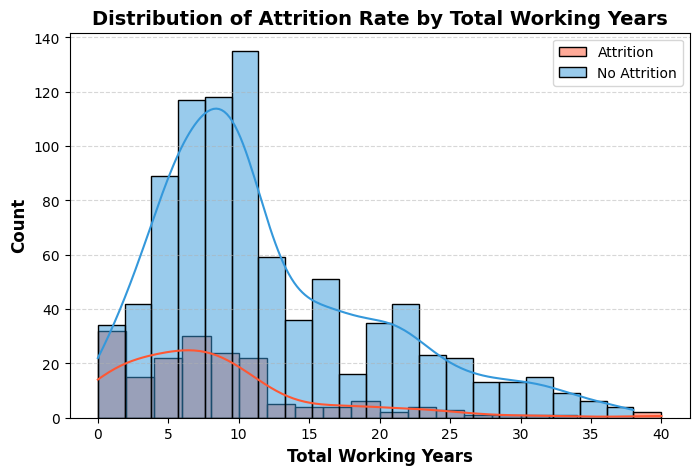

In [24]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype(int)

# ============================== Analisis Attrition by Total Working Years ==============================
# Menghitung total karyawan & attrition berdasarkan TotalWorkingYears
employee_per_years = df["TotalWorkingYears"].value_counts().sort_index()
attrition_per_years = df[df['Attrition'] == 1]['TotalWorkingYears'].value_counts().sort_index()
attrition_years_percentage = (attrition_per_years / employee_per_years) * 100

# Menampilkan Tabel Analisis
attrition_years_df = pd.DataFrame({
    "Total Employees": employee_per_years,
    "Attrition Count": attrition_per_years,
    "Attrition Rate (%)": attrition_years_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Total Working Years:\n", attrition_years_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi dengan Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(df[df['Attrition'] == 1]['TotalWorkingYears'], bins=20, color="#FF5733", kde=True, label="Attrition")
sns.histplot(df[df['Attrition'] == 0]['TotalWorkingYears'], bins=20, color="#3498DB", kde=True, label="No Attrition")
plt.xlabel("Total Working Years", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Total Working Years", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**Insight:** Karyawan dengan pengalaman kerja lebih sedikit (0-10 tahun) cenderung lebih mudah attrition daripada karyawan dengan pengalaman kerja lebih lama. Ini menunjukkan pentingnya retensi awal karir dan pengembangan karyawan.


 Attrition Rate by Years At Company:
                 Total Employees  Attrition Count  Attrition Rate (%)
YearsAtCompany                                                      
40                            1              1.0               100.0
32                            2              1.0                50.0
0                            31             11.0                35.5
1                           128             44.0                34.4
31                            3              1.0                33.3
2                            88             19.0                21.6
4                            75             14.0                18.7
3                            98             18.0                18.4
14                           11              2.0                18.2
24                            6              1.0                16.7
10                           79             13.0                16.5
7                            64              9.0                

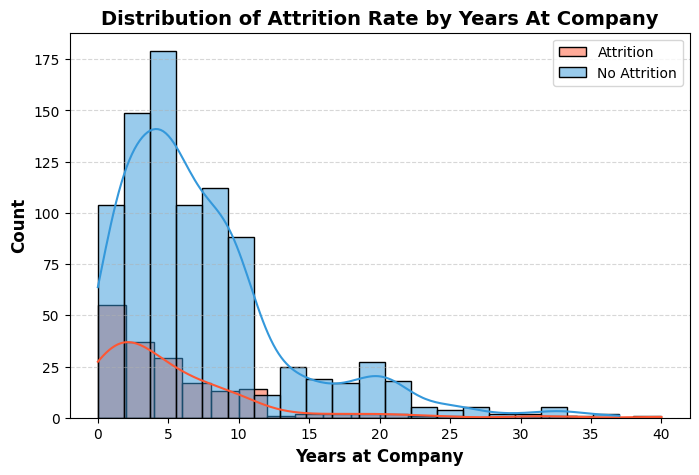

In [25]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['YearsAtCompany'] = df['YearsAtCompany'].astype(int)

# ============================== Analisis Attrition by Years At Company ==============================
# Menghitung total karyawan & attrition berdasarkan YearsAtCompany
employee_per_years = df["YearsAtCompany"].value_counts().sort_index()
attrition_per_years = df[df['Attrition'] == 1]['YearsAtCompany'].value_counts().sort_index()
attrition_years_percentage = (attrition_per_years / employee_per_years) * 100

# Menampilkan Tabel Analisis
attrition_years_df = pd.DataFrame({
    "Total Employees": employee_per_years,
    "Attrition Count": attrition_per_years,
    "Attrition Rate (%)": attrition_years_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Years At Company:\n", attrition_years_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi dengan Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(df[df['Attrition'] == 1]['YearsAtCompany'], bins=20, color="#FF5733", kde=True, label="Attrition")
sns.histplot(df[df['Attrition'] == 0]['YearsAtCompany'], bins=20, color="#3498DB", kde=True, label="No Attrition")
plt.xlabel("Years at Company", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Years At Company", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**Insight:** Karyawan dengan masa kerja singkat (0-5 tahun) cenderung memiliki tingkat attrition lebih tinggi. Ini membuktikan bahwa karyawan baru cenderung lebih sering cepat keluar dari perusahaan (tidak mampu bertahan).


 Attrition Rate by Work-Life Balance:
                  Total Employees  Attrition Count  Attrition Rate (%)
WorkLifeBalance                                                      
1                             56               18                32.1
4                            113               22                19.5
2                            251               45                17.9
3                            638               94                14.7


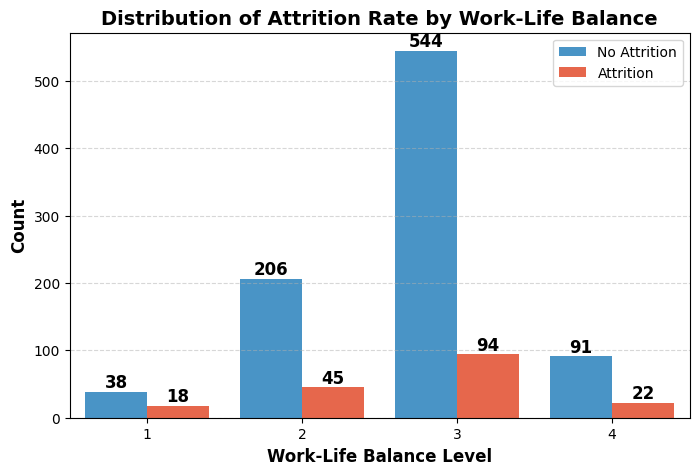

In [26]:
# Pastikan kolom memiliki format numerik yang sesuai
df['Attrition'] = df['Attrition'].astype(float).astype(int)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(int)

# ============================== Analisis Attrition by Work-Life Balance ==============================
# Menghitung total karyawan & attrition berdasarkan Work-Life Balance
employee_per_worklife = df["WorkLifeBalance"].value_counts().sort_index()
attrition_per_worklife = df[df['Attrition'] == 1]['WorkLifeBalance'].value_counts().sort_index()
attrition_worklife_percentage = (attrition_per_worklife / employee_per_worklife) * 100

# Menampilkan Tabel Analisis
attrition_worklife_df = pd.DataFrame({
    "Total Employees": employee_per_worklife,
    "Attrition Count": attrition_per_worklife,
    "Attrition Rate (%)": attrition_worklife_percentage.round(1)
}).fillna(0)

print("\n Attrition Rate by Work-Life Balance:\n", attrition_worklife_df.sort_values("Attrition Rate (%)", ascending=False))

# Visualisasi dengan Countplot
plt.figure(figsize=(8,5))
ax = sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df, palette=["#3498DB", "#FF5733"])  # Biru untuk No Attrition, Merah untuk Attrition

plt.xlabel("Work-Life Balance Level", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Attrition Rate by Work-Life Balance", fontsize=14, fontweight="bold")
plt.legend(["No Attrition", "Attrition"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0, fontsize=10)

# Menampilkan nilai di atas setiap bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Hanya menampilkan jika ada data
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f"{height:.0f}",
            ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
        )

plt.show()

Work Life Balance:

1: Low\
2: Good\
3: Excellent\
4: Outstanding

**Insight:** Berdasarkan persentase attrition rate, karyawan dengan tingkat "Low" memiliki kecenderungan lebih cepat keluar dari perusahaan dilanjutkan karyawan dengan tingkat oustanding, good dan excellent.

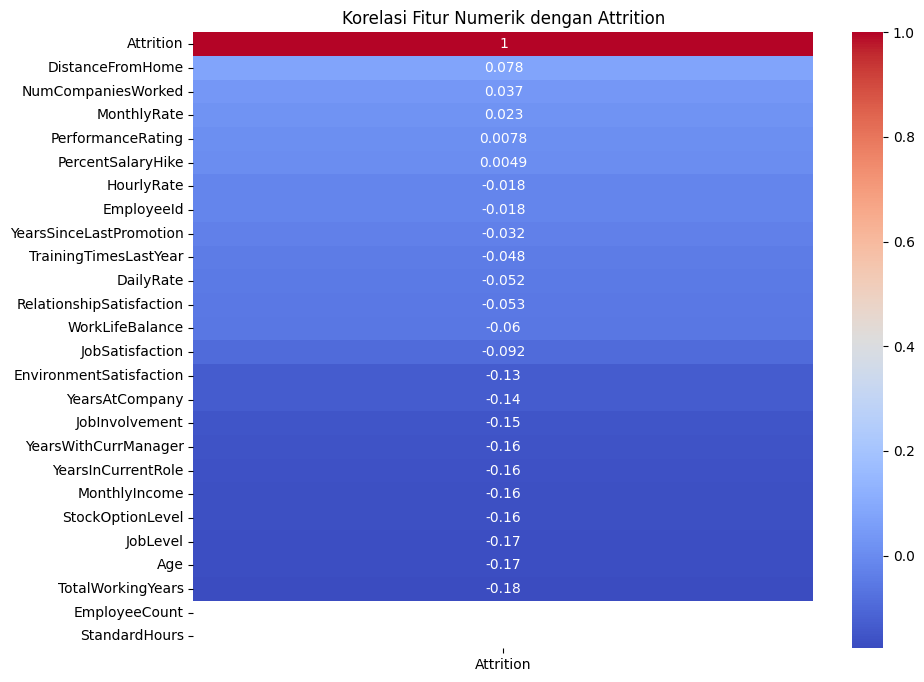

In [27]:
# Korelasi Fitur Numerik dengan Attrition
corr_matrix = df.corr(numeric_only=True)

# Visualisasi Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur Numerik dengan Attrition")
plt.show()

Berdasarkan visualisasi heatmap di atas, fitur numerik yang memiliki hubungan kuat terhadap attrition adalah DistanceFromHome, NumCompaniesWorked, dan MonthlyRate.

Fitur Kategorikal terhadap Attrition

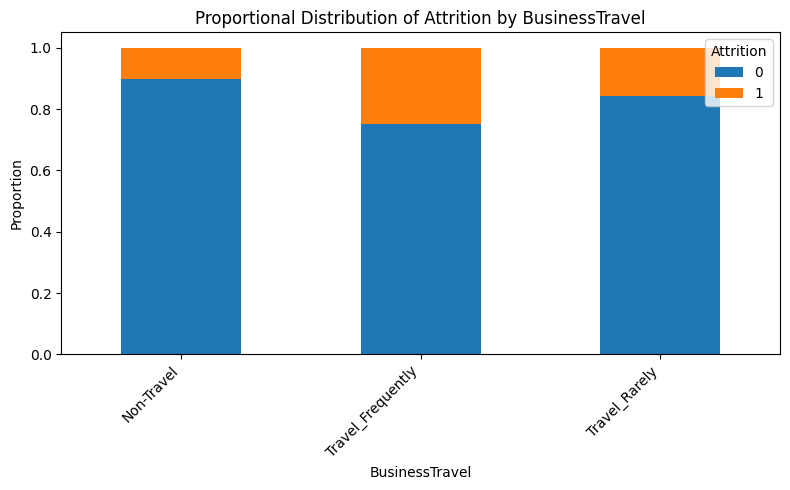

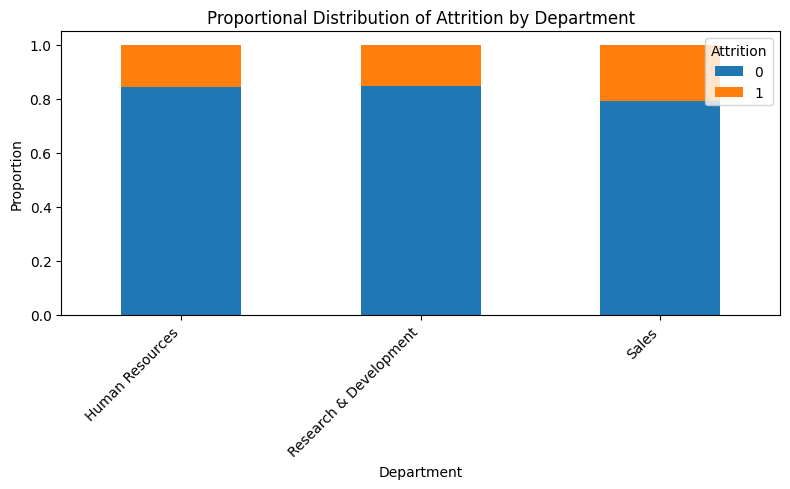

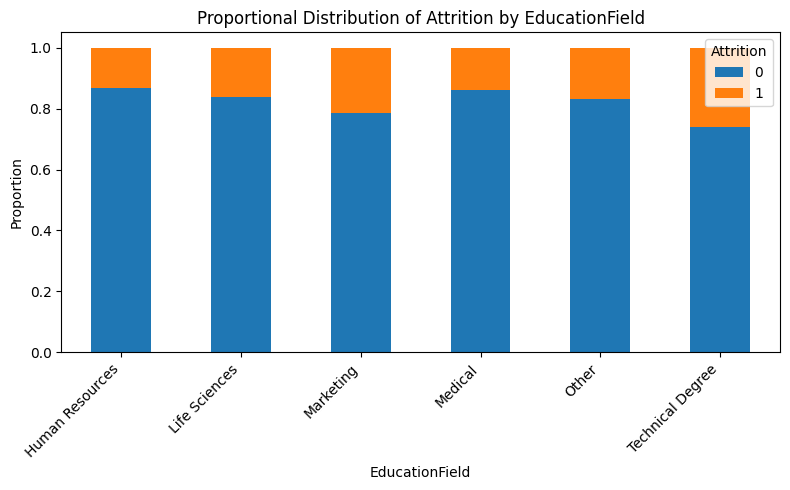

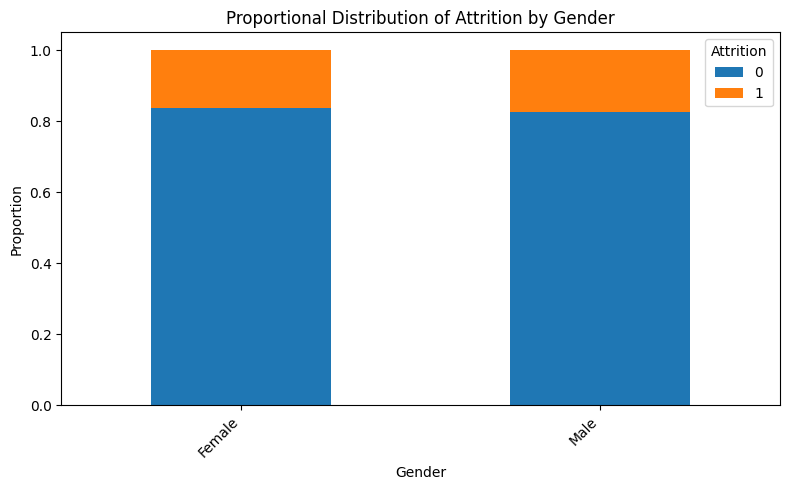

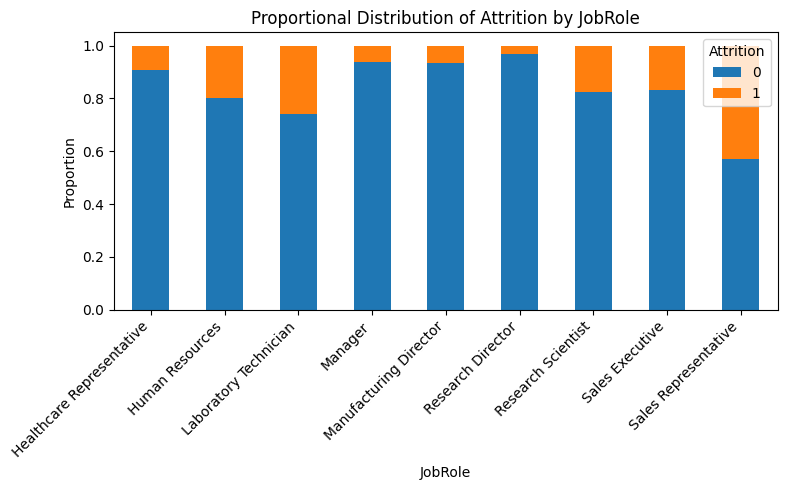

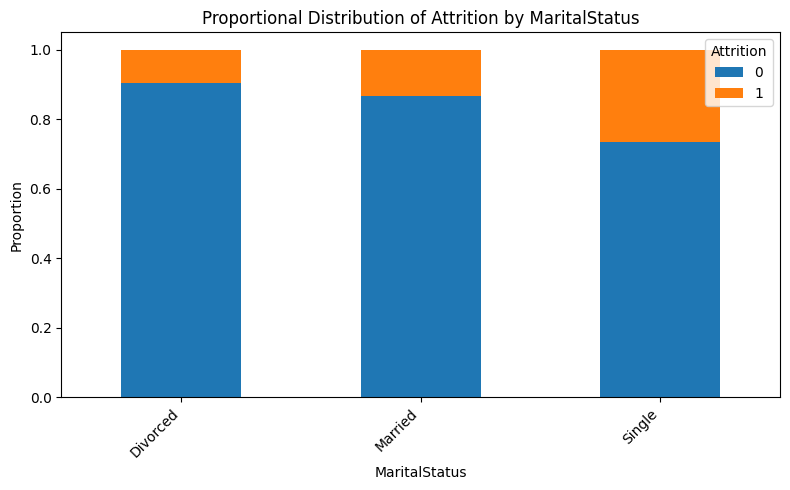

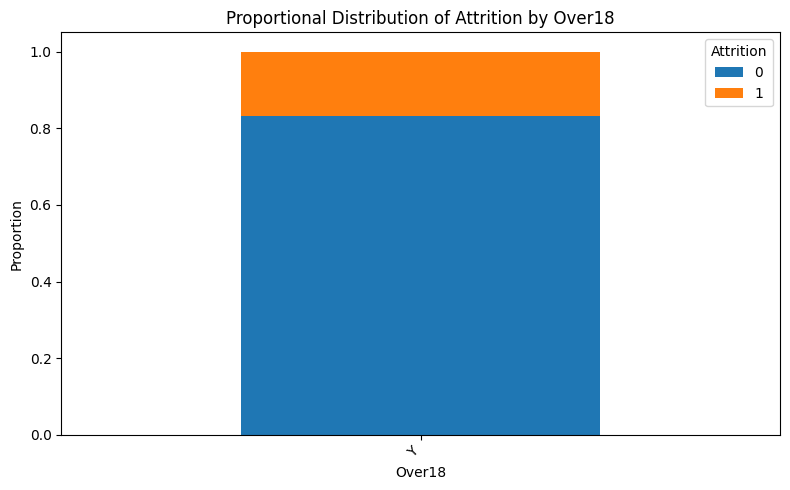

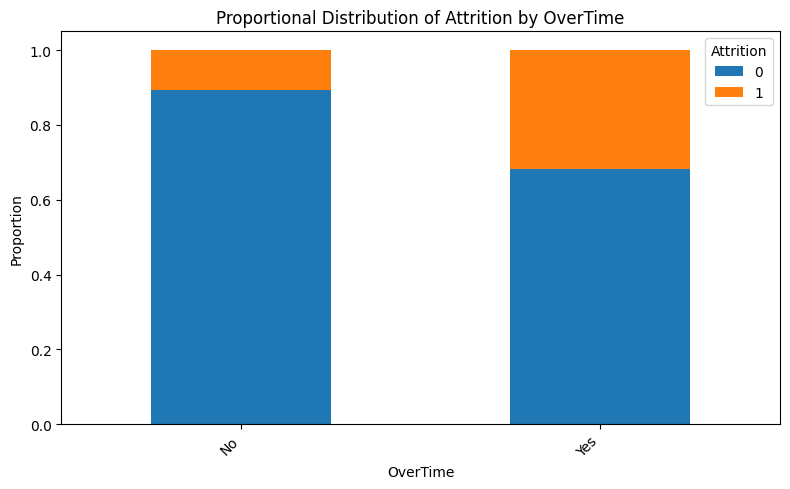

In [28]:
for col in cat_cols:
    # Hitung distribusi antara kategori fitur dan attrition
    attrition_distribution = pd.crosstab(df[col], df["Attrition"])

    # Normalisasi setiap kategori agar berbentuk proporsi
    attrition_distribution_percentage = attrition_distribution.div(attrition_distribution.sum(axis=1), axis=0)

    # Plot stacked bar chart
    attrition_distribution_percentage.plot(kind="bar", stacked=True, figsize=(8, 5))

    # Tambahkan detail grafik
    plt.title(f"Proportional Distribution of Attrition by {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend(title="Attrition", loc="upper right")
    plt.xticks(rotation=45, ha="right")  # Rotasi label untuk visibilitas yang lebih baik
    plt.tight_layout()  # Optimalisasi tata letak
    plt.show()

Berdasarkan stacked bar chart terdapat beberapa insight yang diperoleh:
1. OverTime (Lembur): karyawan yang sering lembur (Overtime = Yes) memiliki kecenderungan attrition yang lebih tinggi
2. MaritalStatus (Status Pernikahan): karyawan single (belum menikah) lebih rentan keluar dibandingkan sudah menikah. Mungkin dikarenakan masih belum memiliki tanggungan
3. JobRole: pekerjaan dengan peran Sales Representative dan Laboratory Technician memiliki kecenderungan attrition yang lebih tinggi
4. BusinessTravel: karyawan yang sering melakukan perjalanan bisnis memiliki kecenderungan risiko keluar lebih tinggi dibandingkan kategori lainnya

In [29]:
from scipy.stats import chi2_contingency

chi_square_results = []

# Gunakan fitur kategorikal dari dataset asli (`df`)
for feature in cat_cols:  # Sesuaikan dengan fitur kategorikal yang telah kamu definisikan
    if feature in df.columns:  # Pastikan fitur ada dalam dataset
        contingency_table = pd.crosstab(df[feature], df["Attrition"])  # Membuat tabel kontingensi

        # Hitung uji Chi-Squared
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Simpan hasil dalam list
        chi_square_results.append({
            "Feature": feature,
            "Chi-Square Statistic": chi2,
            "p-value": p
        })

# Konversi hasil ke dalam DataFrame
chi_square_df = pd.DataFrame(chi_square_results)

# Urutkan berdasarkan nilai Chi-Squared terbesar untuk melihat fitur paling berpengaruh
chi_square_df = chi_square_df.sort_values(by="Chi-Square Statistic", ascending=False)

print("\n Hasil Chi-Squared Test untuk Fitur Kategorikal terhadap Attrition:\n")
chi_square_df


 Hasil Chi-Squared Test untuk Fitur Kategorikal terhadap Attrition:



,Feature,Chi-Square Statistic,p-value
7,OverTime,67.763459,1.843342e-16
4,JobRole,66.393971,2.556695e-11
5,MaritalStatus,37.621652,6.769585e-09
0,BusinessTravel,13.403348,1.228853e-03
2,EducationField,9.811529,8.075507e-02
1,Department,4.627283,9.890046e-02
3,Gender,0.187941,6.646360e-01
6,Over18,0.000000,1.000000e+00


Berdasarkan hasil chi-squared test, diperoleh beberapa informasi sebagai berikut:\
1). Fitur Signifikan terhadap Attrition (p-value < 0,05), menunjukkan hubungan kuat dengan attrition
  * Overtime: karyawan yang bekerja lembur memiliki kemungkinan lebih besar untuk keluar dibandingkan yang bertahan. Bisa jadi karena kelelahan atau ketidakseimbangan work-life.
  * JobRole: peran pekerjaan tertentu mungkin memiliki beban kerja lebih tinggi atau jalur karier yang kurang menarik, sehingga meningkatkan attrition.
  * MaritalStatus: karyawan yang sudah menikah mungkin lebih stabil dalam pekerjaan dibandingkan karyawan yang masih single. Mereka cenderung mencari pekerjaan dengan fleksibilitas yang lebih.
  * BusinessTravel: karyawan yang sering melakukan perjalanan bisa lebih rentan terhadap kelelahan dan burnout sehingga meningkatkan kemungkinan mereka keluar.

2). Fitur Tidak Signifikan terhadap Attrition (p-value > 0,05), menunjukkan hubungan yang lemah dengan attrition
  * Fitur EducationField, Department, Gender, dan Over18 tidak memiliki hubungan kuat dengan attrition.


Korelasi Fitur Gabungan terhadap Attrition


 Korelasi Fitur terhadap Attrition:
 OverTime                    0.255856
MaritalStatus               0.177989
DistanceFromHome            0.078074
Department                  0.060796
JobRole                     0.056146
EducationField              0.040568
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
Gender                      0.015887
PerformanceRating           0.007755
PercentSalaryHike           0.004907
BusinessTravel             -0.008008
HourlyRate                 -0.017524
EmployeeId                 -0.017912
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.135134
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757


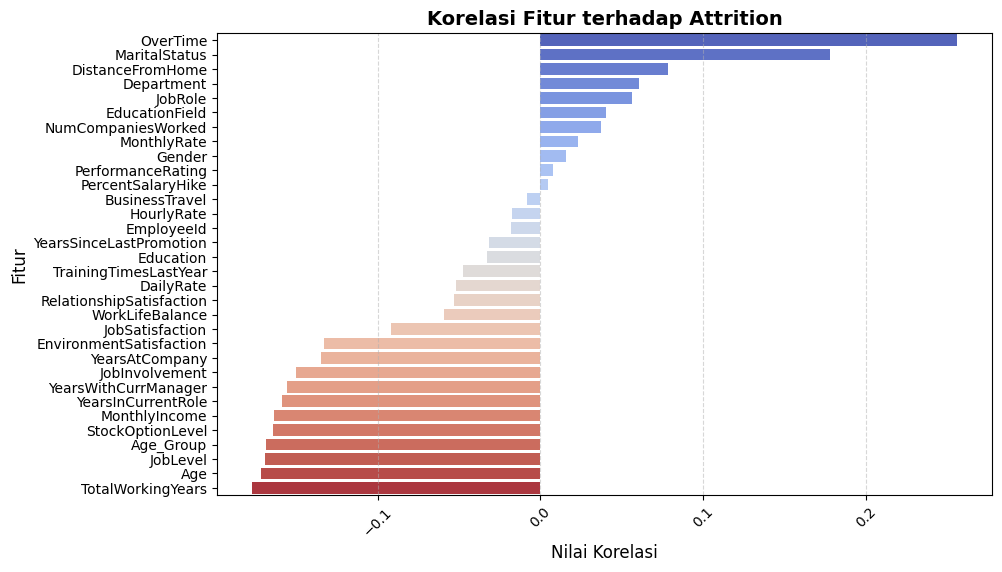

In [30]:
# Salin dataset agar tidak mengubah data asli
df_encoded = df.copy()

# Identifikasi kolom kategorikal
categorical_columns = df_encoded.select_dtypes(include=["object", "category"]).columns

# Konversi kolom kategorikal ke numerik menggunakan LabelEncoder
encoder = LabelEncoder()
for column in categorical_columns:
    df_encoded[column] = encoder.fit_transform(df_encoded[column])

# Hapus fitur yang tidak berkontribusi terhadap korelasi (berisi nilai tetap atau tidak relevan)
columns_to_drop = ["EmployeeCount", "Over18", "StandardHours", "Attrition_color"]
df_encoded = df_encoded.drop(columns=columns_to_drop, errors="ignore")

# Hitung matriks korelasi untuk seluruh fitur dalam dataset
correlation_matrix = df_encoded.corr()

# Ambil korelasi fitur terhadap 'Attrition' dan urutkan dari yang paling signifikan
corr_attrition = correlation_matrix["Attrition"].sort_values(ascending=False)

# Hapus kolom 'Attrition' dari daftar sebelum visualisasi
corr_attrition = corr_attrition.drop(labels=["Attrition"])

# Menampilkan tabel korelasi
print("\n Korelasi Fitur terhadap Attrition:\n", corr_attrition)

# ============================== Visualisasi Korelasi dalam Bar Chart ==============================
plt.figure(figsize=(10,6))
sns.barplot(x=corr_attrition.values, y=corr_attrition.index, palette="coolwarm")
plt.title("Korelasi Fitur terhadap Attrition", fontsize=14, fontweight="bold")
plt.xlabel("Nilai Korelasi", fontsize=12)
plt.ylabel("Fitur", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

**Insights:**

**Top 3 Korelasi Positif terhadap Attrition**  

1️). **OverTime (+0.256)**\
Karyawan yang sering bekerja lembur memiliki kemungkinan lebih tinggi untuk keluar dari perusahaan. Ini menunjukkan bahwa **jam kerja yang berlebihan mungkin menjadi faktor stres atau ketidakpuasan** yang mendorong mereka mencari peluang di tempat lain dengan keseimbangan kerja yang lebih baik. Bisa jadi, kebijakan lembur yang terlalu sering menyebabkan burnout dan mengurangi motivasi untuk tetap bertahan.  

2️). **MaritalStatus (+0.178)**\
Status pernikahan memiliki korelasi positif dengan attrition, yang bisa mengindikasikan bahwa **karyawan lajang atau dalam kondisi pernikahan tertentu lebih cenderung meninggalkan perusahaan**. Mungkin karyawan yang belum menikah lebih fleksibel dalam mencari pekerjaan baru atau pindah ke lokasi lain, sementara mereka yang sudah menikah mungkin memiliki pertimbangan finansial atau kestabilan yang berbeda dalam keputusan untuk bertahan atau keluar.  

3️). **DistanceFromHome (+0.078)**\
Semakin jauh jarak rumah dari tempat kerja, semakin besar kemungkinan karyawan mengalami attrition. Hal ini bisa terjadi karena **waktu perjalanan yang panjang menyebabkan kelelahan atau ketidakpuasan** sehingga mereka memilih pekerjaan yang lebih dekat dengan rumah. Selain itu, karyawan dengan perjalanan jauh mungkin mengalami lebih banyak kesulitan dalam mengelola keseimbangan antara kehidupan pribadi dan pekerjaan, yang mendorong mereka untuk mencari opsi lain.  

---

**Top 3 Korelasi Negatif terhadap Attrition**  

1️). **TotalWorkingYears (-0.177)**\
Karyawan dengan pengalaman kerja lebih lama memiliki kecenderungan lebih rendah untuk keluar dari perusahaan. Ini bisa karena **mereka telah membangun stabilitas finansial dan karier** atau mereka sudah nyaman dengan lingkungan kerja dan lebih kecil kemungkinannya untuk mencari peluang lain. Selain itu, mereka mungkin memiliki lebih banyak insentif seperti program pensiun atau tunjangan senioritas yang membuat mereka tetap bertahan.  

2️). **Age (-0.172)**\
 Semakin tua usia karyawan, semakin kecil kemungkinan mereka mengalami attrition. Karyawan yang lebih tua mungkin **lebih stabil dalam pekerjaan mereka, memiliki tanggung jawab finansial lebih besar, atau merasa lebih nyaman dengan peran yang sudah mereka kuasai**. Mereka cenderung mencari kestabilan daripada mengejar peluang baru, terutama jika mereka sudah memiliki posisi yang cukup mapan dalam perusahaan.  

3️). **JobLevel (-0.169)**\
Karyawan dengan level jabatan lebih tinggi memiliki tingkat attrition yang lebih rendah, mungkin karena mereka **sudah mendapatkan manfaat finansial dan jabatan yang lebih stabil**. Semakin tinggi level pekerjaan, semakin besar kemungkinan bahwa mereka memiliki keterlibatan tinggi dalam perusahaan serta insentif seperti bonus, gaji lebih tinggi, dan jalur karier yang jelas.  




## Data Preparation / Preprocessing

In [31]:
# Fitur seleksi
selected_features = ['Attrition', 'OverTime', 'JobRole', 'MaritalStatus', 'BusinessTravel', 'DistanceFromHome', 'NumCompaniesWorked', 'MonthlyRate', 'TotalWorkingYears', 'Age', 'JobLevel']

# Membuat dataframe selection
df_selection = df[selected_features]
df_selection.head()

,Attrition,OverTime,JobRole,MaritalStatus,BusinessTravel,DistanceFromHome,NumCompaniesWorked,MonthlyRate,TotalWorkingYears,Age,JobLevel
1,1,No,Healthcare Representative,Married,Travel_Rarely,11,5,14382,15,37,2
2,1,Yes,Research Scientist,Married,Travel_Rarely,4,9,10332,18,51,1
3,0,No,Sales Executive,Married,Travel_Frequently,26,5,14864,23,42,4
6,0,Yes,Sales Executive,Married,Travel_Rarely,1,2,13273,6,40,2
7,1,Yes,Manager,Married,Travel_Rarely,2,5,21199,24,55,5


Berikut adalah alasan mengapa fitur-fitur di atas relevan:

**1. OverTime**
- Karyawan yang sering lembur mungkin mengalami **kelelahan atau ketidakseimbangan work-life**, yang meningkatkan kemungkinan keluar dari perusahaan.  

**2. JobRole**
- Peran pekerjaan bisa menentukan **beban kerja, jalur karier, dan kepuasan kerja**, sehingga memengaruhi keputusan untuk bertahan atau keluar.  

**3. MaritalStatus**
- Status pernikahan bisa berhubungan dengan **stabilitas pekerjaan**, karena karyawan yang sudah menikah mungkin lebih mempertimbangkan manfaat jangka panjang.  
- Sebaliknya, mereka yang belum menikah bisa lebih fleksibel dalam mencari peluang baru.

**4. BusinessTravel**
- Perjalanan bisnis yang terlalu sering dapat menyebabkan **kelelahan** atau kurangnya work-life balance.  
- Karyawan yang lebih sering bepergian mungkin lebih cenderung mencari pekerjaan dengan fleksibilitas lebih.

**5. DistanceFromHome**
- Semakin jauh lokasi tempat tinggal dari kantor, semakin besar potensi **beban perjalanan dan kejenuhan**.  
- Bisa menjadi faktor utama bagi karyawan yang mencari posisi lebih dekat dengan rumah.

**6. NumCompaniesWorked**
- Jumlah perusahaan sebelumnya bisa menunjukkan **stabilitas karier seseorang**.  
- Karyawan dengan banyak pengalaman kerja sebelumnya mungkin lebih **terbuka terhadap peluang baru**.

**7. MonthlyRate**
- Gaji bulanan adalah indikator kepuasan finansial karyawan.  
- Jika gaji tidak kompetitif dibanding industri, bisa memicu **keputusan keluar untuk mencari kompensasi lebih baik**.

**8. TotalWorkingYears**
- Pengalaman kerja total bisa berpengaruh pada **loyalitas terhadap perusahaan**.  
- Karyawan dengan pengalaman lebih banyak mungkin lebih mempertimbangkan stabilitas kerja.

**9. Age**
- Usia bisa berhubungan dengan **keputusan karier dan preferensi kerja**.  
- Karyawan yang lebih muda mungkin lebih banyak berpindah kerja dibanding yang lebih senior.

**10. JobLevel**
- Tingkat jabatan menunjukkan **pengaruh dan keterlibatan karyawan dalam organisasi**.  
- Level pekerjaan rendah mungkin lebih mudah mengalami attrition dibanding senior-level.


**Kesimpulan**\
Pilihan fitur ini menunjukkan bahwa **faktor operasional (OverTime, BusinessTravel), demografi (Age, MaritalStatus), dan keuangan (MonthlyRate, JobLevel)** sebagai elemen kunci yang mempengaruhi attrition.  




In [32]:
# One Hot-Encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df_selection, dtype=int)

df_encoded.head()

,Attrition,DistanceFromHome,NumCompaniesWorked,MonthlyRate,TotalWorkingYears,Age,JobLevel,OverTime_No,OverTime_Yes,JobRole_Healthcare Representative,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
1,1,11,5,14382,15,37,2,1,0,1,...,0,0,0,0,0,1,0,0,0,1
2,1,4,9,10332,18,51,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,26,5,14864,23,42,4,1,0,0,...,0,0,1,0,0,1,0,0,1,0
6,0,1,2,13273,6,40,2,0,1,0,...,0,0,1,0,0,1,0,0,0,1
7,1,2,5,21199,24,55,5,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition                          1058 non-null   int64
 1   DistanceFromHome                   1058 non-null   int64
 2   NumCompaniesWorked                 1058 non-null   int64
 3   MonthlyRate                        1058 non-null   int64
 4   TotalWorkingYears                  1058 non-null   int64
 5   Age                                1058 non-null   int64
 6   JobLevel                           1058 non-null   int64
 7   OverTime_No                        1058 non-null   int64
 8   OverTime_Yes                       1058 non-null   int64
 9   JobRole_Healthcare Representative  1058 non-null   int64
 10  JobRole_Human Resources            1058 non-null   int64
 11  JobRole_Laboratory Technician      1058 non-null   int64
 12  JobRole_Manager          

In [34]:
X = df_encoded.drop("Attrition", axis=1)
Y = df_encoded["Attrition"]

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1058, 23)
Shape of Y: (1058,)


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Misal X dan y adalah fitur dan target
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Terapkan SMOTE hanya pada data training
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi sebelum SMOTE:\n", y_train.value_counts())
print("Distribusi sesudah SMOTE:\n", pd.Series(y_resampled).value_counts())

Distribusi sebelum SMOTE:
 Attrition
0    706
1    140
Name: count, dtype: int64
Distribusi sesudah SMOTE:
 Attrition
0    706
1    706
Name: count, dtype: int64


In [37]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Modelling

In [38]:
# Definisikan model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

# Training setiap model
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model  # Simpan model yang sudah dilatih

## Evaluation


🔹 Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       173
           1       0.64      0.18      0.28        39

    accuracy                           0.83       212
   macro avg       0.74      0.58      0.59       212
weighted avg       0.80      0.83      0.79       212



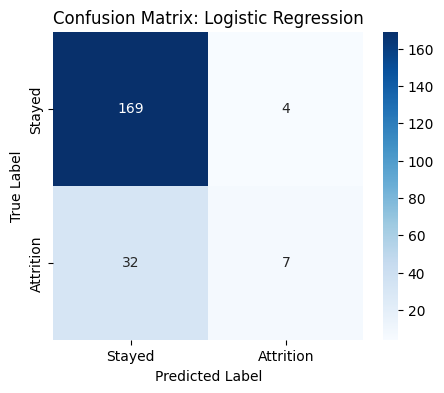


🔹 Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       173
           1       0.64      0.18      0.28        39

    accuracy                           0.83       212
   macro avg       0.74      0.58      0.59       212
weighted avg       0.80      0.83      0.79       212



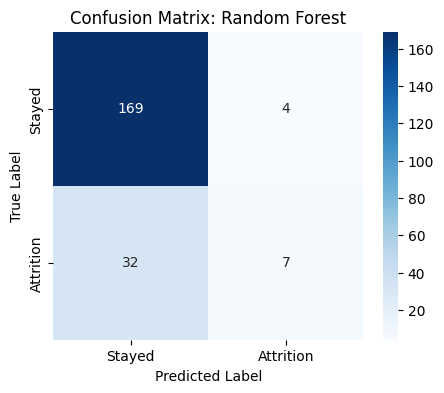


🔹 Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       173
           1       0.52      0.31      0.39        39

    accuracy                           0.82       212
   macro avg       0.69      0.62      0.64       212
weighted avg       0.80      0.82      0.80       212



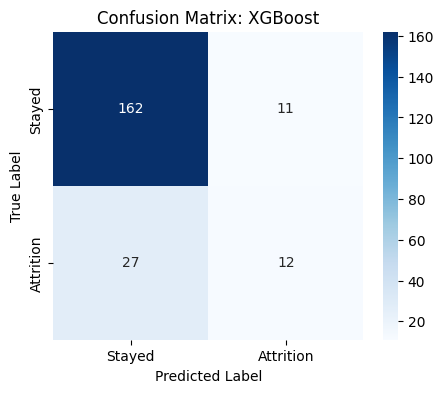

In [39]:
# Evaluasi model dengan classification report & confusion matrix
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    print(f"\n🔹 Model: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Stayed", "Attrition"], yticklabels=["Stayed", "Attrition"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

## Modelling Ensemble

In [40]:
from sklearn.ensemble import VotingClassifier

# Inisialisasi model
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Voting classifier
voting_model = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgb)],
    voting="soft"  # gunakan "hard" jika hanya ingin mayoritas voting
)

# Fit model pada data training hasil SMOTE
voting_model.fit(X_resampled, y_resampled)

# Evaluasi model
from sklearn.metrics import classification_report

y_pred = voting_model.predict(X_test)
print("🔹 Model: Voting Ensemble")
print(classification_report(y_test, y_pred))

🔹 Model: Voting Ensemble
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       173
           1       0.54      0.36      0.43        39

    accuracy                           0.83       212
   macro avg       0.70      0.64      0.66       212
weighted avg       0.81      0.83      0.81       212



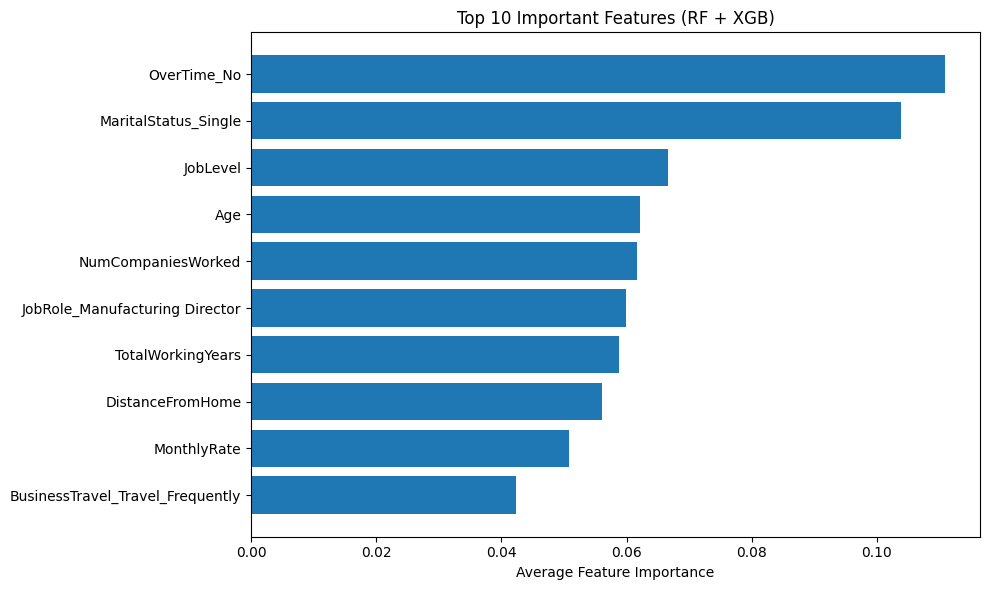

In [41]:
# Ambil model tree-based dari ensemble
rf_model = voting_model.named_estimators_['rf']
xgb_model = voting_model.named_estimators_['xgb']

# Ambil nama fitur
feature_names = X.columns  # gunakan X dari data finalmu

# Hitung importance rata-rata
avg_importance = (
    rf_model.feature_importances_ + xgb_model.feature_importances_
) / 2

# Buat DataFrame untuk visualisasi
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Average Importance': avg_importance
}).sort_values(by='Average Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'][:10][::-1], importances_df['Average Importance'][:10][::-1])
plt.xlabel("Average Feature Importance")
plt.title("Top 10 Important Features (RF + XGB)")
plt.tight_layout()
plt.show()

Berdasarkan hasil interpretasi model ensemble terhadap data attrition, diperoleh bahwa faktor paling berpengaruh dalam memprediksi kemungkinan karyawan keluar meliputi beban kerja berlebih (OverTime), status pernikahan (Single), tingkat jabatan (JobLevel), dan faktor demografis serta kompensasi seperti usia, jumlah perusahaan sebelumnya, jarak rumah ke kantor, dan gaji bulanan. Temuan ini menunjukkan bahwa keputusan karyawan untuk keluar sangat dipengaruhi oleh kombinasi tekanan kerja, karakteristik personal, dan kepuasan terhadap lingkungan kerja. Insight ini dapat menjadi dasar strategis bagi tim HR untuk menyusun kebijakan retensi yang lebih tepat sasaran dan berbasis data.

In [42]:
# Simpan Random Forest dan XGBoost yang sudah dilatih
joblib.dump(trained_models["Random Forest"], "random_forest.pkl")
joblib.dump(trained_models["XGBoost"], "xgboost.pkl")

['xgboost.pkl']

## Deployment

In [43]:
# Muat model dan scaler
rf_model = joblib.load('random_forest.pkl')
xgb_model = joblib.load('xgboost.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Data dummy karyawan dengan risiko tinggi attrition
df_dummy_attrition = pd.DataFrame({
    "DistanceFromHome": [20],
    "NumCompaniesWorked": [3],
    "MonthlyRate": [8000],
    "TotalWorkingYears": [3],
    "Age": [25],
    "JobLevel": [1],
    "OverTime_No": [0],
    "OverTime_Yes": [1],
    "JobRole_Healthcare Representative": [0],
    "JobRole_Human Resources": [0],
    "JobRole_Laboratory Technician": [0],
    "JobRole_Manager": [0],
    "JobRole_Manufacturing Director": [0],
    "JobRole_Research Director": [0],
    "JobRole_Research Scientist": [0],
    "JobRole_Sales Executive": [0],
    "JobRole_Sales Representative": [1],
    "MaritalStatus_Divorced": [0],
    "MaritalStatus_Married": [0],
    "MaritalStatus_Single": [1],
    "BusinessTravel_Non-Travel": [0],
    "BusinessTravel_Travel_Frequently": [1],
    "BusinessTravel_Travel_Rarely": [0]
})

# Normalisasi data dummy dengan scaler
df_dummy_scaled = loaded_scaler.transform(df_dummy_attrition)

# Mapping hasil prediksi
mapping = {0: "Karyawan kemungkinan akan Stay", 1: "Karyawan kemungkinan akan Leave"}

# Prediksi dengan kedua model
rf_proba = rf_model.predict_proba(df_dummy_scaled)[:, 1]  # Probabilitas kelas "Leave" dari RF
xgb_proba = xgb_model.predict_proba(df_dummy_scaled)[:, 1]  # Probabilitas kelas "Leave" dari XGB

# Ensemble dengan average voting
ensemble_proba = (rf_proba + xgb_proba) / 2  # Rata-rata probabilitas dari kedua model
ensemble_pred = [1 if p >= 0.5 else 0 for p in ensemble_proba]  # Prediksi final berdasarkan threshold 0.5

# Tampilkan hasil prediksi
print(f"Prediksi Ensemble: {mapping[ensemble_pred[0]]}")
print(f"Probabilitas Stay: {(1 - ensemble_proba[0]) * 100:.2f}%")
print(f"Probabilitas Leave: {ensemble_proba[0] * 100:.2f}%")

Prediksi Ensemble: Karyawan kemungkinan akan Leave
Probabilitas Stay: 8.72%
Probabilitas Leave: 91.28%


In [44]:
pip freeze > requirements.txt